In [1]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R", local = T)
source("R/Cbind.R", local = T)

Loading required package: behavr



In [2]:
data <- data.table::fread(file = "tidy_data_wide.csv")


In [3]:
table(data$Training)


       1X 6X_Massed 6X_Spaced 
      311        26       314 

In [4]:
experiments <- c("24hr LTM", "24hr LTM CHX", "20min STM")
genotypes <- c("Iso31", "orb2")
wild_types <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")

data <- data[
    (experiment %in% c("24hr LTM", "24hr LTM CHX") & Genotype %in% wild_types & Training == "6X_Spaced") |
    (Genotype %in% "orb2"),]

data <-data[interval=="NONE",]
data <- data[Files %in% unique(grep(x=Files, pattern="SD", invert=TRUE, value = TRUE)),]

# data[Genotype != "orb2", Genotype:="Iso31"]
data[, Group := paste(experiment, ifelse(Genotype=="orb2", "orb2", "Iso31"), sep="-")]

panel3_data<-data

In [5]:
data$interval

[1] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [11] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [21] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [31] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [41] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [51] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [61] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [71] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [81] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [91] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[101] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[111] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[121] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[131] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[141] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[151] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[161] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[171] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[181] "NONE" "NONE" "NONE" "NONE" "NONE"

In [6]:
panel3_data_long <- melt(panel3_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [7]:
table(panel3_data$Genotype)


                        Iso31 MB010B.(II)SPARC-Chrimson ISO 
                           92                            50 
                         orb2 
                           43 

In [8]:
A <- panel3_data[experiment=="24hr LTM" & Genotype %in% wild_types ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel3_data[experiment=="24hr LTM CHX" & Genotype %in% wild_types,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel3_data[experiment=="24hr LTM" & Genotype == "orb2",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel3_data[experiment=="20min STM" & Genotype == "orb2",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd, Cd, Dd)
colnames(X) <- c("24hr LTM", "24hr LTM CHX", "24hr LTM orb2", "20min STM orb2")

In [9]:
print(paste(
    nrow(A),
    nrow(B),
    nrow(C),
    nrow(D)  
))

[1] "78 64 22 21"


In [10]:
data.table::fwrite(x = A, file="prism/Fig3/Figure_3_24hr LTM.csv")
data.table::fwrite(x = B, file="prism/Fig3/Figure_3_24hr LTM CHX.csv")
data.table::fwrite(x = C, file="prism/Fig3/Figure_3_24hr LTM orb2.csv")
data.table::fwrite(x = D, file="prism/Fig3/Figure_3_20min STM orb2.csv")
data.table::fwrite(x = X, file="prism/Fig3/Figure_3_boxplot.csv")

In [11]:
# sort(table(panel3_data$Files))

In [12]:
panel3_data_long$Group <- factor(panel3_data_long$Group, levels=c("24hr LTM-Iso31", "24hr LTM CHX-Iso31", "24hr LTM-orb2", "20min STM-orb2"))

In [13]:
table(panel3_data_long$Group)/2


    24hr LTM-Iso31 24hr LTM CHX-Iso31      24hr LTM-orb2     20min STM-orb2 
                78                 64                 22                 21 

[1] -1.02  1.02
[1] 0.37


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4

$direction
[1] "horizontal"

$annotation
              group__ y_position annotations stars   N test           PI
1:     24hr LTM-Iso31        0.5     < 0.001   *** 156  PRE  0.020354090
2:     24hr LTM-Iso31        0.5     < 0.001   *** 156 POST -0.223206146
3: 24hr LTM CHX-Iso31        0.5      0.0568    NS 128  PRE  0.004453125
4: 24hr LTM CHX-Iso31        0.5      0.0568    NS 128 POST -0.051015625
5:      24hr LTM-orb2        0.5      0.9323    NS  44  PRE  0.015681818
6:      24hr LTM-orb2        0.5      0.9323    NS  44 POST  0.122272727
7:     20min STM-orb2        0.5     < 0.001   ***  42  PRE  0.009761905
8:     20min STM-orb2        0.5     < 0.001   ***  42 POST -0.215714286
   PI_median     PI_std   std_error x
1:     0.000 0.07535724 0.006033408 1
2:    -0.150 0.34929618 0.027966076 2
3:     0.000 0.06271703 0.005543455 1
4:     0.000 0.26457840 0.023385648 2
5:     0.000 0.08549987 0.012889590 1
6:     0.085 0.31605729 0.047647429 2
7:     0.000 0

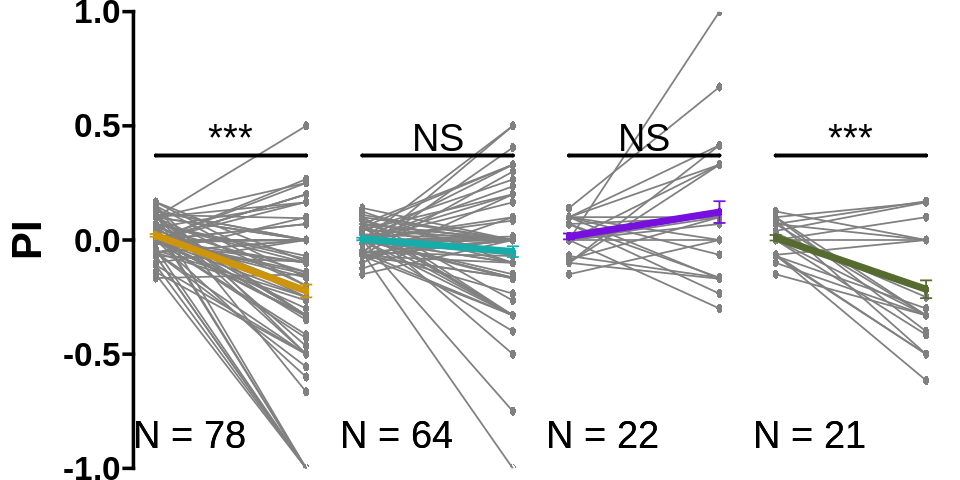

In [14]:
size_unit=2
ratio=2
panel3A <- learning_plot(
    panel3_data_long, "Group", y_limits=c(-1, .7),
    hjust_text = 0.2, textsize = 8, starsize=8,
    y_annotation = 0.37,
    colors=colors_panel3
)
save_learning_plot(plot=panel3A, filename = "figures/panel3.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.width=size_unit*panel3A$n_facets, repr.plot.height=size_unit*ratio)
panel3A

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
     id            group__    PRE       POST        dPI outlier
 1: 141     24hr LTM-Iso31  0.100  0.5000000  0.4000000    TRUE
 2: 158     24hr LTM-Iso31  0.065 -1.0000000 -1.0650000    TRUE
 3: 214 24hr LTM CHX-Iso31 -0.055 -1.0000000 -0.9450000    TRUE
 4: 225     24hr LTM-Iso31  0.115 -1.0000000 -1.1150000    TRUE
 5: 277 24hr LTM CHX-Iso31 -0.055  0.5000000  0.5550000    TRUE
 6: 278 24hr LTM CHX-Iso31  0.000 -0.7500000 -0.7500000    TRUE
 7: 290      24hr LTM-orb2  0.000  1.0000000  1.0000000    TRUE
 8: 310 24hr LTM CHX-Iso31  0.000  0.5000000  0.5000000    TRUE
 9: 337      24hr LTM-orb2  0.070 -0.2350000 -0.3050000    TRUE
10: 342     20min STM-orb2  0.040  0.1650000  0.1250000    TRUE
11: 344     20min STM-orb2  0.085 -0.5000000 -0.5850000    TRUE
12: 562     24hr LTM-Iso31  0.000  0.2666667  0.2666667    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

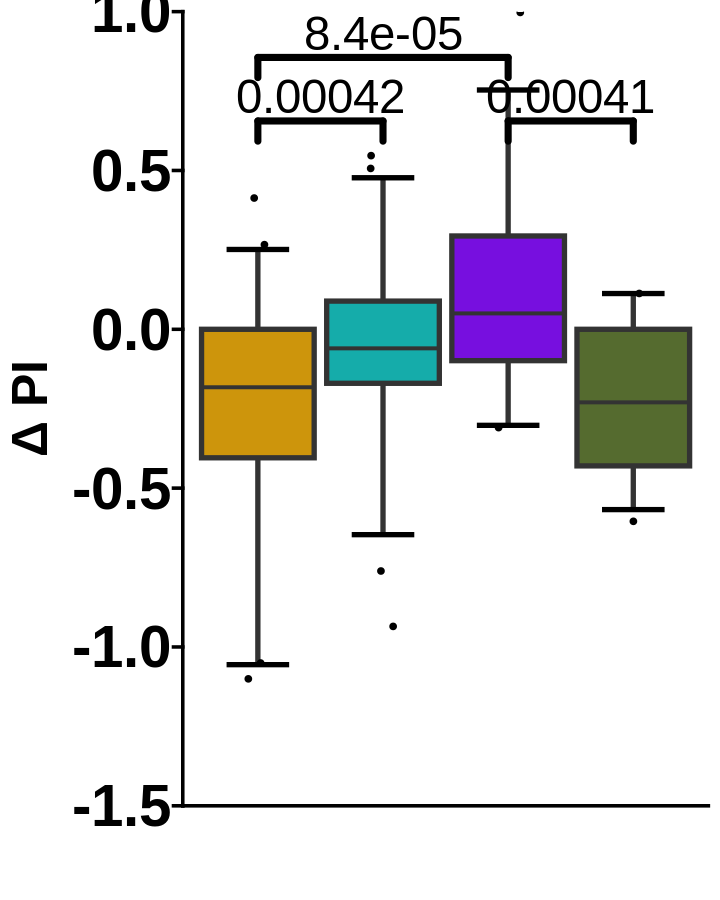

In [15]:
size_unit=1.5
ratio=5

panel3B <- summary_plot(
    panel3_data_long,
    "Group",
    comparisons=list(
        c("24hr LTM-Iso31", "24hr LTM CHX-Iso31"),
        c("24hr LTM-Iso31", "24hr LTM-orb2"),
        c("24hr LTM-orb2", "20min STM-orb2")        
    ),
    annotation_y=c(.55, .75, .55),
    test=unpaired_t_test,
    map_signif_level=FALSE,
    y_limits=c(-1.5, 1),
    text_y_size=35,
    title_y_size=30,
    starsize=10,
    colors=colors_panel3,
    percentile=c(0.025, 0.975)
)
panel3B$gg <- panel3B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank(),
)
#scale_y_continuous(breaks = seq(-1, 0.5, 0.5), limits=c(-1, 0.5))
options(repr.plot.width=size_unit*panel3B$n_facets, repr.plot.height=size_unit*ratio)
panel3B
save_summ_plot(plot=panel3B, filename = "figures/panel3B.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.alig

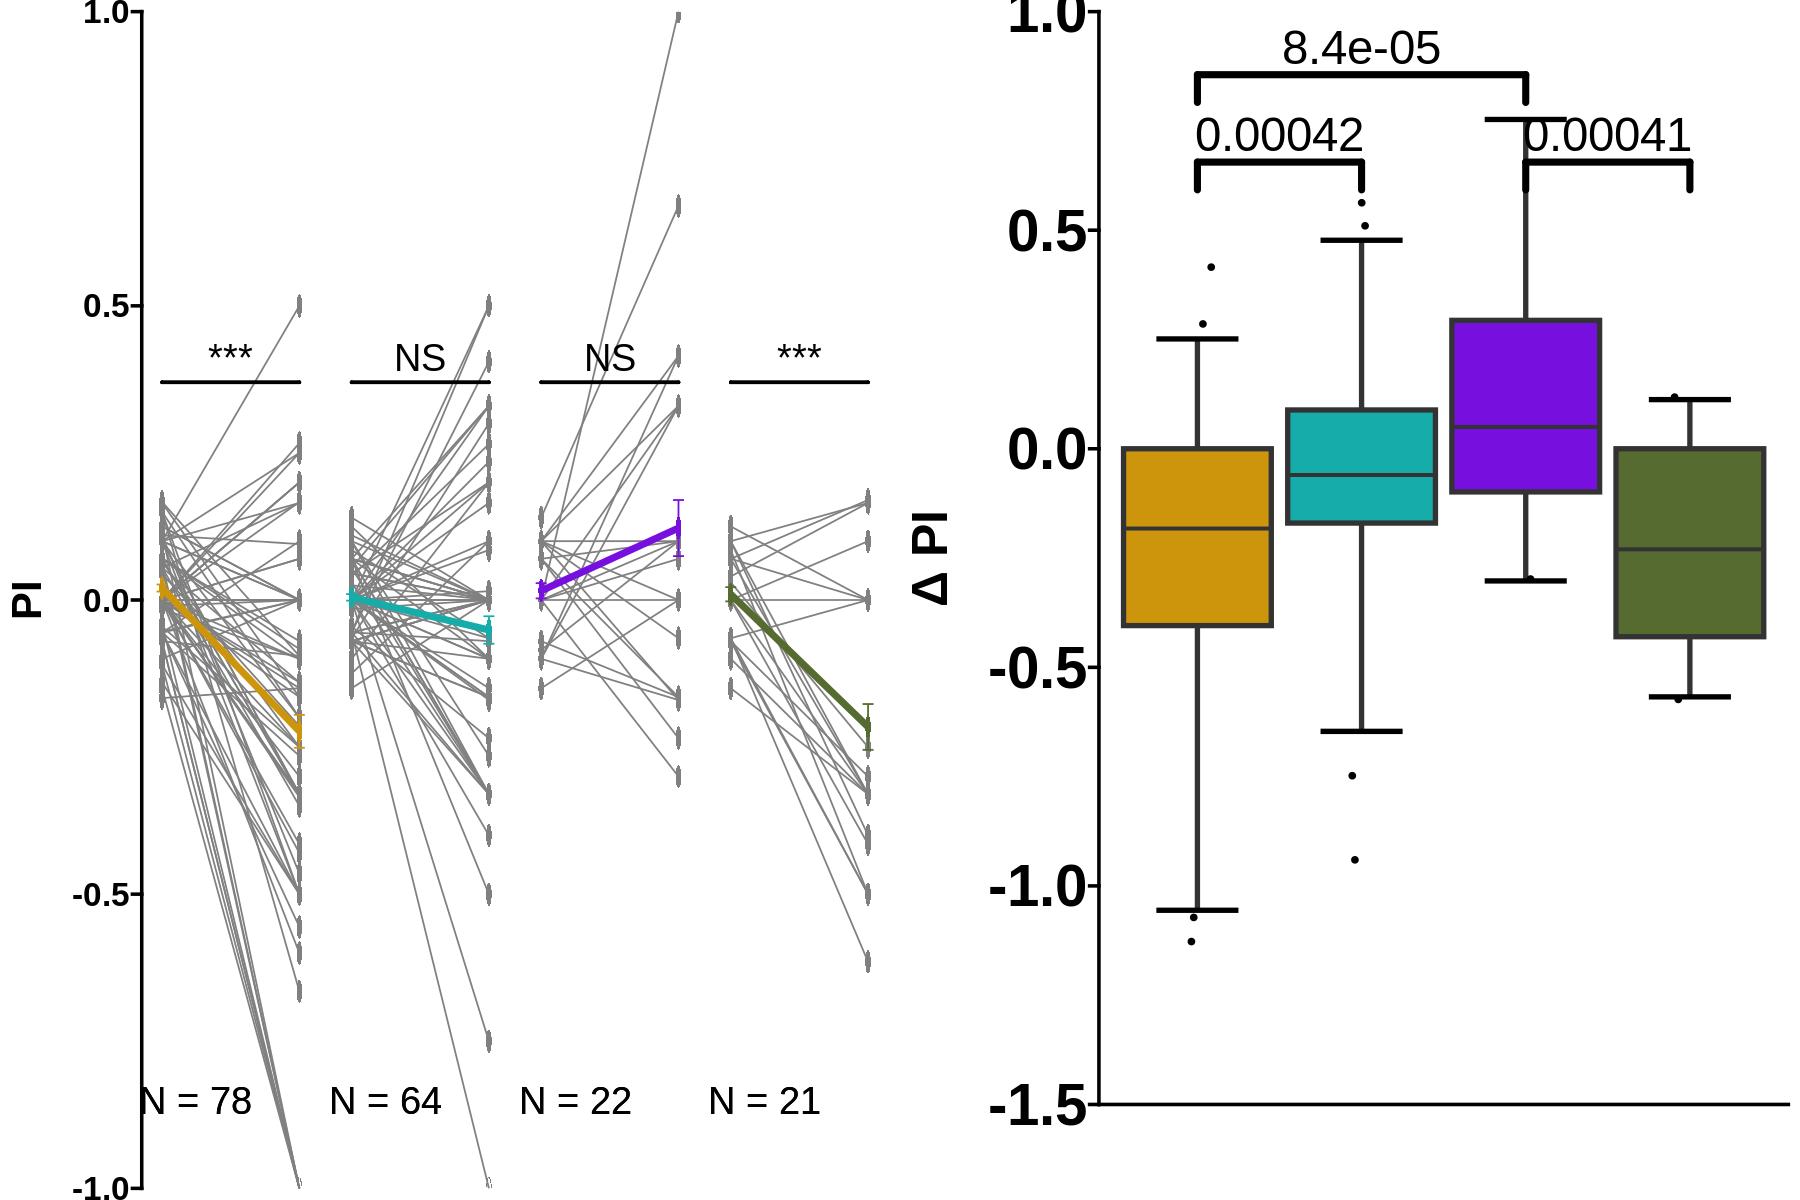

In [16]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel3A$gg, panel3B$gg, ncol=2)
ggsave(plot = gg, filename = "figures/Figure_3.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg